In [3]:
import numpy as np 
from matplotlib import pyplot
%matplotlib inline

In [4]:
T = 150.0  
dt = 0.02  
N = int(T / dt) + 1  
t = np.linspace(0.0, T, num=N)  

In [5]:
z0 = 150.0  
b0 = 15.0  
zt = 150.0  
g = 9.81  

u = np.array([z0, b0])

z = np.zeros(N)
z[0] = z0

In [6]:
for n in range(1, N):
    rhs = np.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]

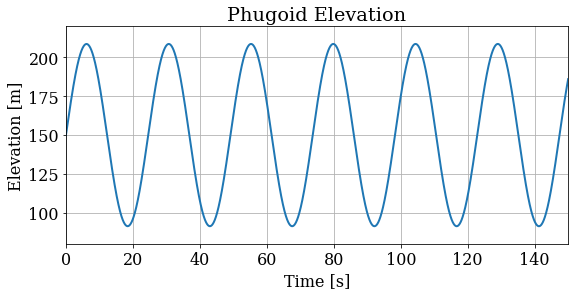

In [16]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

pyplot.figure(figsize=(9.0, 4.0))  
pyplot.title('Phugoid Elevation')  
pyplot.xlabel('Time [s]')  
pyplot.ylabel('Elevation [m]')  
pyplot.xlim(t[0], t[-1])  
pyplot.ylim(80.0, 220.0)  
pyplot.grid()  
pyplot.plot(t, z, color='C0', linestyle='-', linewidth=2);

In [8]:
z_exact = (b0 * (zt / g)**0.5 * np.sin((g / zt)**0.5 * t) + (z0 - zt) * np.cos((g / zt)**0.5 * t) + zt)

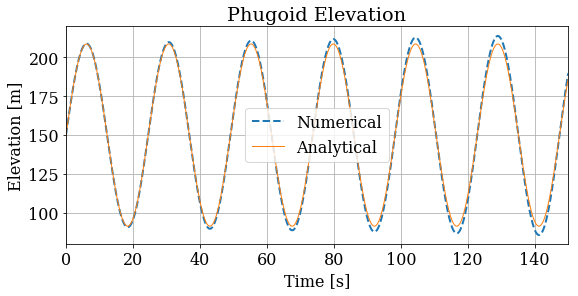

In [9]:
pyplot.figure(figsize=(9.0, 4.0))  
pyplot.title('Phugoid Elevation')  
pyplot.xlabel('Time [s]')  
pyplot.ylabel('Elevation [m]')  
pyplot.xlim(t[0], t[-1])  
pyplot.ylim(80.0, 220.0)  
pyplot.grid()  
pyplot.plot(t, z, label='Numerical', color='C0', linestyle='--', linewidth=2)
pyplot.plot(t, z_exact, label='Analytical', color='C1', linestyle='-', linewidth=1)
pyplot.legend();

In [10]:
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]

z_values = []

for dt in dt_values:
    N = int(T / dt) + 1  
    t = np.linspace(0.0, T, num=N)  
    u = np.array([z0, b0])
    z = np.empty_like(t)
    z[0] = z0
    for n in range(1, N):
        rhs = np.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]  
    z_values.append(z)  

In [11]:
def l1_error(z, z_exact, dt):
    
    error = dt * np.sum(np.abs(z - z_exact))
    return error

In [12]:
a = np.array([1, 2, 3])
b = np.array([4, 4, 4])

b - a

array([3, 2, 1])

In [13]:
error_values = []

for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1  
    t = np.linspace(0.0, T, num=N)  
    z_exact = (b0 * (zt / g)**0.5 * np.sin((g / zt)**0.5 * t) + (z0 - zt) * np.cos((g / zt)**0.5 * t) + zt)
    error_values.append(l1_error(z, z_exact, dt))

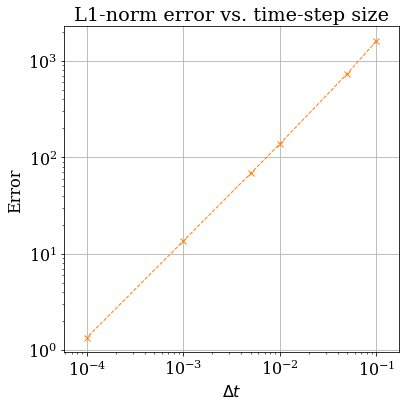

In [15]:
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm error vs. time-step size')  
pyplot.xlabel('$\Delta t$')  
pyplot.ylabel('Error')  
pyplot.grid()
pyplot.loglog(dt_values, error_values, color='C1', linestyle='--', marker='x', linewidth=1)  
pyplot.axis('equal');  